In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [121]:
# create new list by skipping certain number of elements in old list
def create_sublist(lst_a, lst_b, num=10):
    lst_a_new = []
    lst_b_new = []
    count = 0
    for x in lst_a:
        if count%num == 0:
            lst_a_new.append(lst_a[count])
            lst_b_new.append(str(lst_b[count]))
        count += 1

    return lst_a_new, lst_b_new

In [ ]:
def moving_average(lst, ndays):
    lst_new = []
    ma = 0.0
    count = 0
    for x in lst:
        if count < ndays:
            ma += x
        else:
            lst_new.append(ma)
            count = 0
            ma = x
            
        count += 1

    

In [122]:
# Dataset   security daily prices - SP500, AAPL, MCD, TNX(10-year bond)
#        features    categorical    two variables
#        features    continuous     four variables
#        outcome      
df = pd.read_csv('../data-101/Security/Dataset.csv')

In [123]:
# feature variables,   four ratio variables: Date, Price, High, Low
df.head()

,Security,Symbol,Date,Price,High,Low
0,Equity,SP500,1/2/2018,2695.810059,2695.889893,2682.360107
1,Equity,SP500,1/3/2018,2713.060059,2714.370117,2697.770020
2,Equity,SP500,1/4/2018,2723.989990,2729.290039,2719.070068
3,Equity,SP500,1/5/2018,2743.149902,2743.449951,2727.919922
4,Equity,SP500,1/8/2018,2747.709961,2748.510010,2737.600098


In [124]:
# outcome variables:  component


In [125]:
# First rescale Price individually according to Symbol
m_list = df.groupby('Symbol').mean()
m_list.head()

,Price,High,Low
Symbol,,,
AAPL,189.053427,190.994104,187.183506
EURUSD,1.181678,NaN,NaN
MCD,166.062350,167.424223,164.749881
SP500,2746.214183,2762.645180,2730.284103
TNX,2.913685,2.931853,2.894677


In [126]:
m_AAPL = m_list.Price[0]
m_EURUSD = m_list.Price[1]
m_MCD = m_list.Price[2]
m_SP500 = m_list.Price[3]
m_TNX = m_list.Price[4]

# Create new DataFrame features, with Price rescaled by mean of each security 
features = pd.DataFrame(columns=['Date', 'AAPL', 'MCD', 'SP500', 'TNX', 'EURUSD'])
features['Date'] = df.loc[df['Symbol']=='AAPL', 'Date'].tolist()
features['AAPL'] = df.loc[df['Symbol']=='AAPL', 'Price'].tolist()
features['EURUSD'] = df.loc[df['Symbol']=='EURUSD', 'Price'].tolist()
features['MCD'] = df.loc[df['Symbol']=='MCD', 'Price'].tolist()
features['SP500'] = df.loc[df['Symbol']=='SP500', 'Price'].tolist()
features['TNX'] = df.loc[df['Symbol']=='TNX', 'Price'].tolist()

features['AAPL_rescale'] = (features['AAPL']/m_AAPL).tolist()
features['MCD_rescale'] = (features['MCD']/m_MCD).tolist()
features['SP500_rescale'] = (features['SP500']/m_SP500).tolist()
features['TNX_rescale'] = (features['TNX']/m_TNX).tolist()
features['EURUSD_rescale'] = (features['EURUSD']/m_EURUSD).tolist()

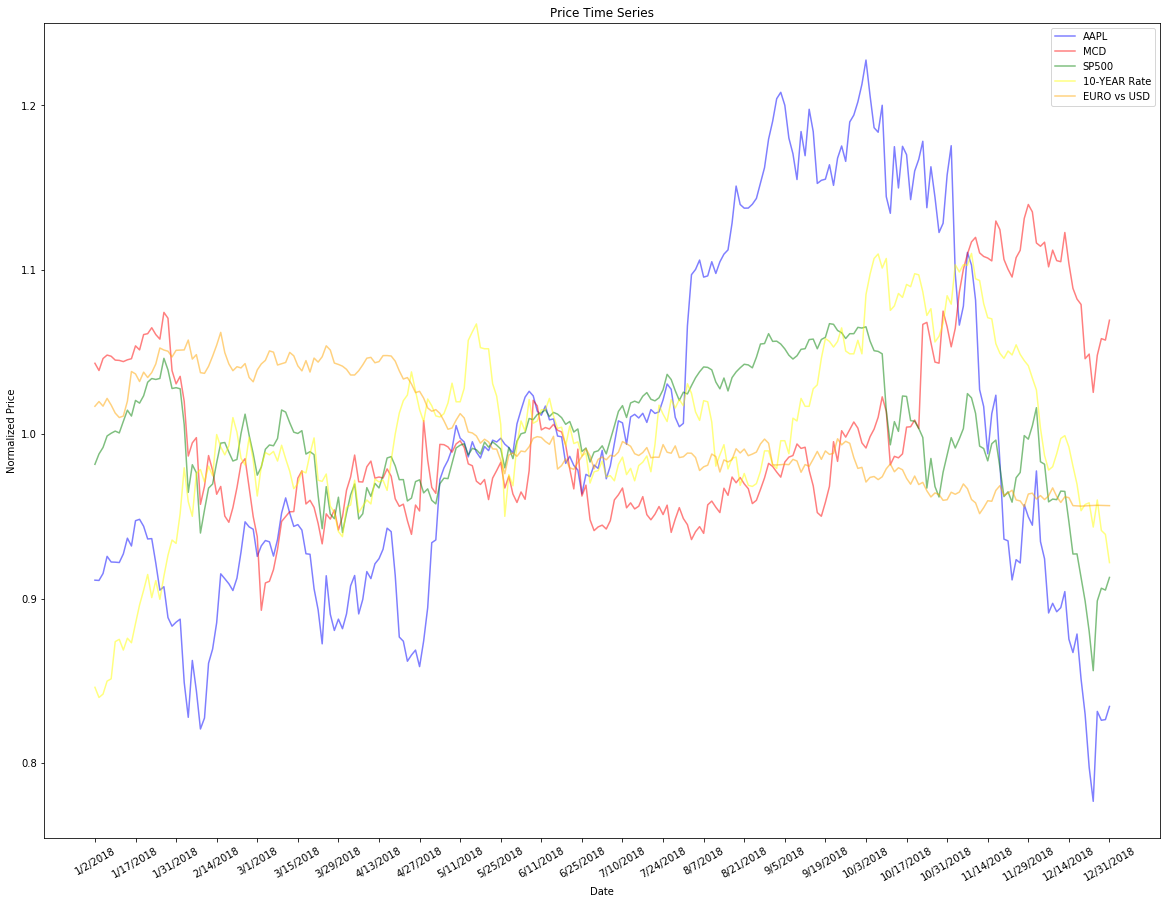

In [127]:
# plot price time series of multiple securities
plt.figure(figsize=(20,15))
plt.plot(features['Date'], features['AAPL_rescale'], color='blue', label='AAPL', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['MCD_rescale'], color='red', label='MCD', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['SP500_rescale'], color='green', label='SP500', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['TNX_rescale'], color='yellow', label='10-YEAR Rate', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['EURUSD_rescale'], color='orange', label='EURO vs USD', alpha=0.5)
plt.legend(loc='upper right')
locs, labels = plt.xticks()
labels = features['Date'].tolist()
locs_new, labels_new = create_sublist(locs, labels, 10)
plt.xticks(rotation=30)
plt.xticks(locs_new, labels_new)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.title("Price Time Series")
plt.show()

In [130]:
features.head()

,Date,AAPL,MCD,SP500,TNX,EURUSD,AAPL_rescale,MCD_rescale,SP500_rescale,TNX_rescale,EURUSD_rescale
0,1/2/2018,172.259995,173.220001,2695.810059,2.465,1.20172,0.911171,1.043102,0.981646,0.846008,1.016960
1,1/3/2018,172.229996,172.490005,2713.060059,2.447,1.20509,0.911012,1.038706,0.987927,0.839830,1.019812
2,1/4/2018,173.029999,173.699997,2723.989990,2.453,1.20178,0.915244,1.045993,0.991907,0.841889,1.017011
3,1/5/2018,175.000000,174.050003,2743.149902,2.476,1.20739,0.925664,1.048100,0.998884,0.849783,1.021759
4,1/8/2018,174.350006,173.929993,2747.709961,2.480,1.20259,0.922226,1.047378,1.000545,0.851156,1.017697


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


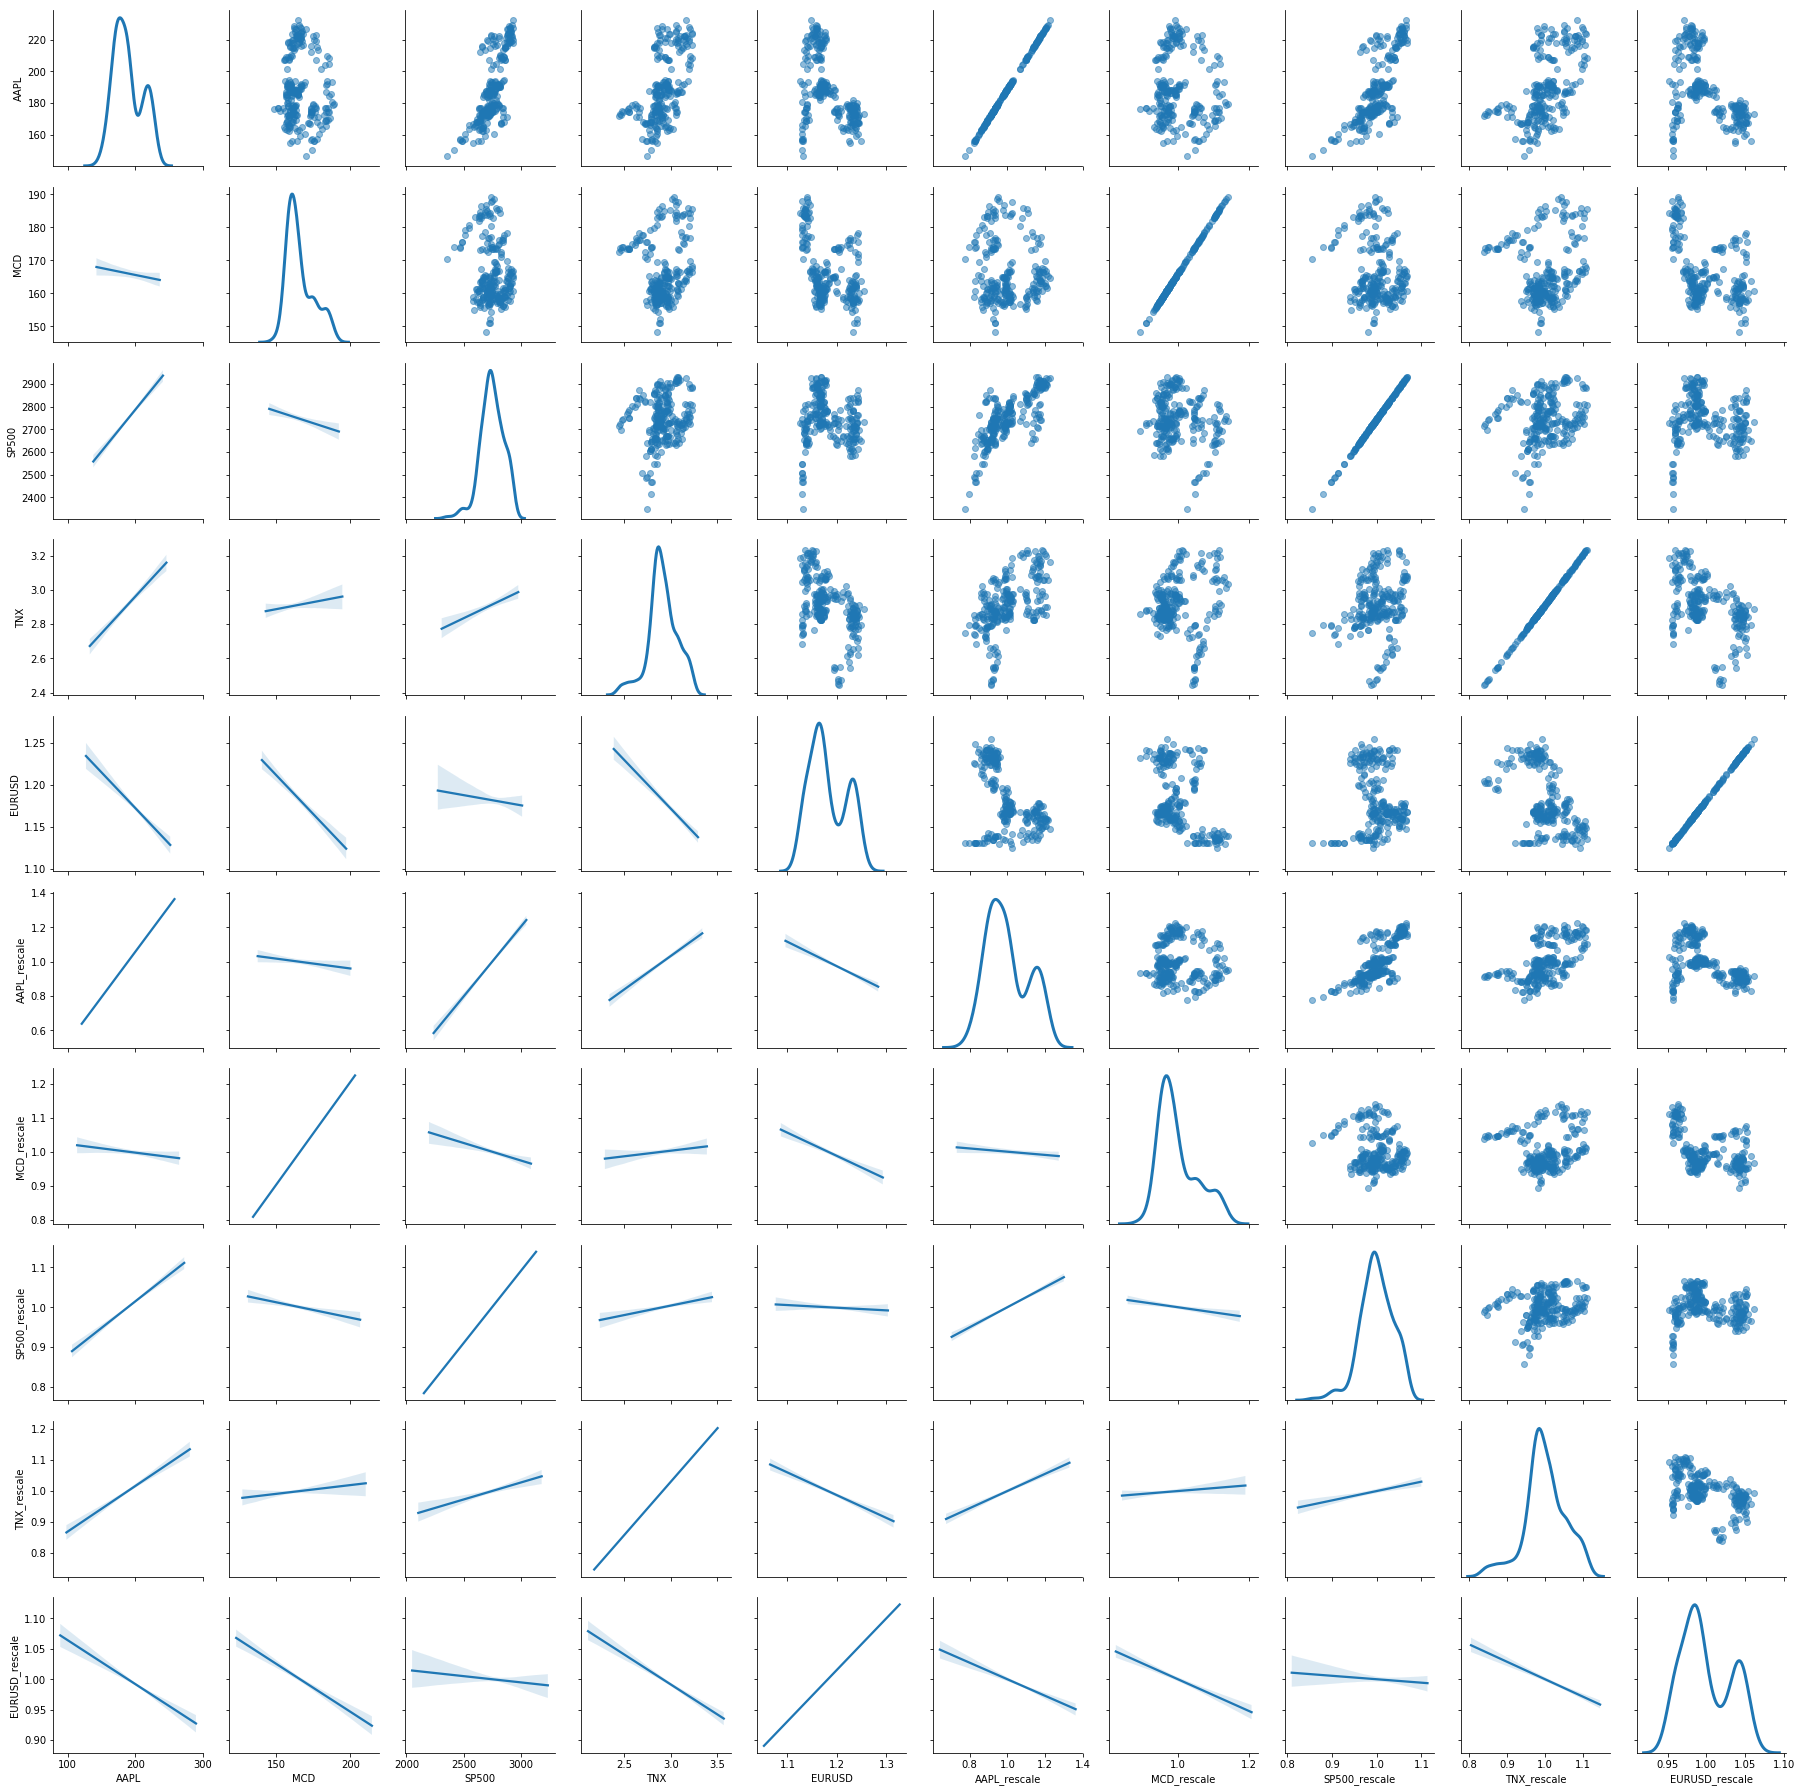

In [129]:
# analyze the data with univariate & bivariate methods
graph = sns.PairGrid(features, diag_sharey=False)
# scatter plots
graph.map_upper(plt.scatter, alpha=0.5)
# fit line showing linear relationship
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# plot the univariate distribution of the variable
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [136]:
fea_clean = features.drop(["AAPL", "MCD", "SP500", "TNX", "EURUSD"], axis=1)

In [140]:
corr_mat = fea_clean.corr()
print(corr_mat)

                AAPL_rescale  MCD_rescale  SP500_rescale  TNX_rescale  \
AAPL_rescale        1.000000    -0.095199       0.752418     0.560947   
MCD_rescale        -0.095199     1.000000      -0.190637     0.094516   
SP500_rescale       0.752418    -0.190637       1.000000     0.204682   
TNX_rescale         0.560947     0.094516       0.204682     1.000000   
EURUSD_rescale     -0.478512    -0.458396      -0.066714    -0.497765   

                EURUSD_rescale  
AAPL_rescale         -0.478512  
MCD_rescale          -0.458396  
SP500_rescale        -0.066714  
TNX_rescale          -0.497765  
EURUSD_rescale        1.000000  


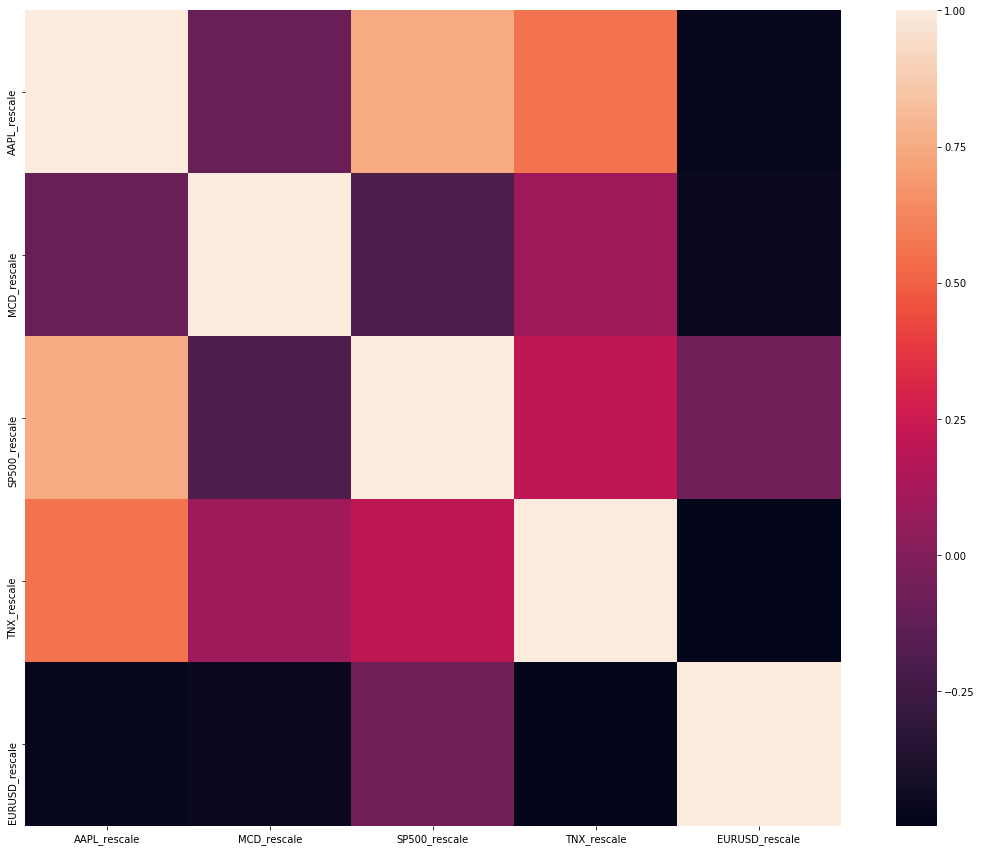

In [139]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
# create ten new features
#   1) normalized price       2) 5-day moving average        3) 20-day moving average
#   4) historical volatility    5) 

In [ ]:
# Use filtering methods